# human mouse integrate

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import scanpy as sc
import scvi

import collections

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, color_map='YlOrRd')
sc.logging.print_version_and_date()


Running Scanpy 1.9.2, on 2023-05-29 15:04.


In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells

In [9]:
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

***
import data

In [46]:
raw_adata = sc.read('./write/human_mouse_integrate_data_prepare_v4.0_adata_human_mouse.h5ad')

In [47]:
raw_adata

AnnData object with n_obs × n_vars = 367850 × 11232
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3'

In [48]:
raw_adata.layers['counts'] = raw_adata.X.copy()

In [50]:
sc.pp.normalize_total(raw_adata, target_sum=1e4)
sc.pp.log1p(raw_adata)
raw_adata.raw = raw_adata  # keep full dimension safe

normalizing counts per cell
    finished (0:00:02)


In [ ]:
adata_clean_obs = pd.read_csv('./write/human_mouse_integrate_scVI_v4.0_adata_clean_obs.csv')

In [52]:
raw_adata

AnnData object with n_obs × n_vars = 367850 × 11232
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3'
    uns: 'log1p'
    layers: 'counts'

In [30]:
adata_clean

AnnData object with n_obs × n_vars = 346296 × 10000
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden', 'leiden_1', 'leiden_annotation', 'Species_annotation'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'rank_genes_groups', 'umap', 'leiden_annotation_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categori

In [53]:
raw_clean = raw_adata[adata_clean.obs.index]

In [54]:
raw_clean

View of AnnData object with n_obs × n_vars = 346296 × 11232
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3'
    uns: 'log1p'
    layers: 'counts'

In [55]:
raw_clean.obsm = adata_clean.obsm
raw_clean.obs = adata_clean.obs

In [56]:
raw_clean

AnnData object with n_obs × n_vars = 346296 × 11232
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden', 'leiden_1', 'leiden_annotation', 'Species_annotation'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3'
    uns: 'log1p'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categoricals', '_scvi_extra_continuous'
    layers: 'counts'

In [57]:
raw_clean.write('./write/human_mouse_integrate_scVI_v4.0_raw_count.h5ad')

Trying to set attribute `.obs` of view, copying.
... storing 'Species_annotation' as categorical


In [8]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=10000,
    layer="counts",
    batch_key="Species",
    subset=True)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [9]:
adata

AnnData object with n_obs × n_vars = 367850 × 10000
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [10]:
scvi.data.setup_anndata(adata, layer="counts", batch_key='Species', 
                        categorical_covariate_keys=["Source","Sample_ID", "Muscle", "10X_chemistry",'Sex'],
                        continuous_covariate_keys=["Mito_per"]
                       )

INFO     Using batches from adata.obs["Species"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 367850 cells, 10000 vars, 2       
         batches, 1 labels, and 0 proteins. Also registered 5 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [11]:
vae = scvi.model.SCVI(adata, n_layers=3, n_latent=30)

In [12]:
vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 22/22: 100%|██████████| 22/22 [14:33<00:00, 39.69s/it, loss=3.06e+03, v_num=1]


In [13]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [14]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:57)
running Leiden clustering
    finished: found 35 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:05:13)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:43)


In [15]:
adata

AnnData object with n_obs × n_vars = 367850 × 10000
    obs: 'Sample_ID', 'Sex', 'Age_yo', 'Species', 'Age_bin', 'Mito_per', 'annotation', 'sub_annotation', 'annotation_old', '10X_chemistry', 'Muscle', 'Source', 'Old_annotation_subcluster', 'batch', 'Age_mo', 'Old_annotation', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden'
    var: 'GeneID-0', 'feature_types-0', 'genome-0', 'GeneName-0', 'n_counts-0', 'n_cells-0', 'human_gene-0', 'GeneID-1', 'feature_types-1', 'genome-1', 'GeneName-1', 'n_cells-1', 'human_gene-1', 'mito-1', 'GeneName-2', 'GeneName-3', 'mito-3', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg', '_scvi', 'neighbors', 'leiden', 'umap'
    obsm: '_scvi_extra_categoricals', '_scvi_extra_continuous', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [11]:
collections.Counter(adata.obs['Source'])

Counter({'Sanger_Zhang_human': 91278,
         'Sanger_Zhang': 68246,
         'Tabula_Muris': 28867,
         'Giordani_Molc_Cell': 12441,
         'Rubenstein_SR': 6860,
         'Li_EMBO_Journal': 9988,
         'Kimmel_Deve': 21554,
         'Micheli_Skeletal_Muscle': 22058,
         'elife': 106558})

In [12]:
adata_mix_index = list(adata[adata.obs['Source']!='Kimmel_Deve'].obs.index)
adata_clean = adata[adata_mix_index]

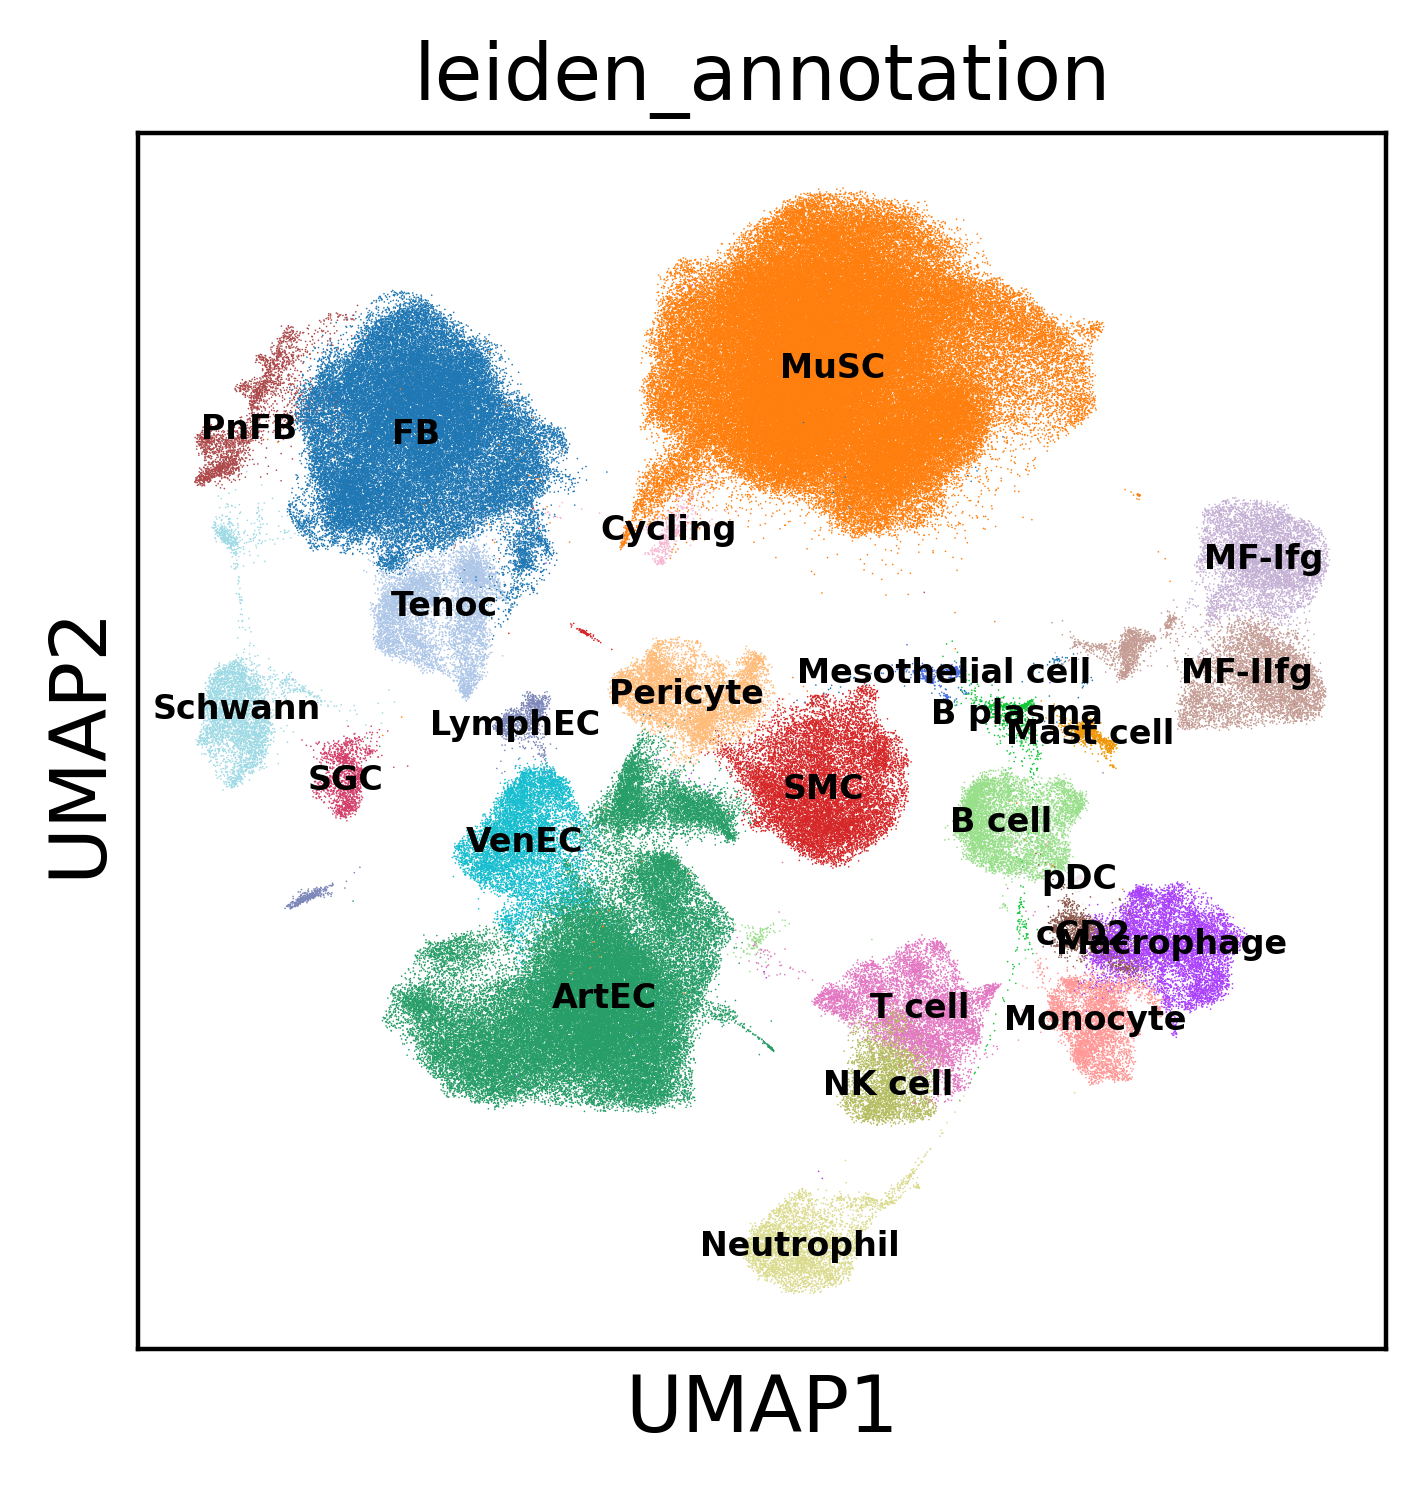

In [17]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata_clean, color=['leiden_annotation']
           ,legend_loc='on data',
           legend_fontsize=6,
           save='human_mouse_integrate_scVI_v4.0_annotation_adata_clean.pdf'
          )
sc.settings.set_figure_params(dpi=100)

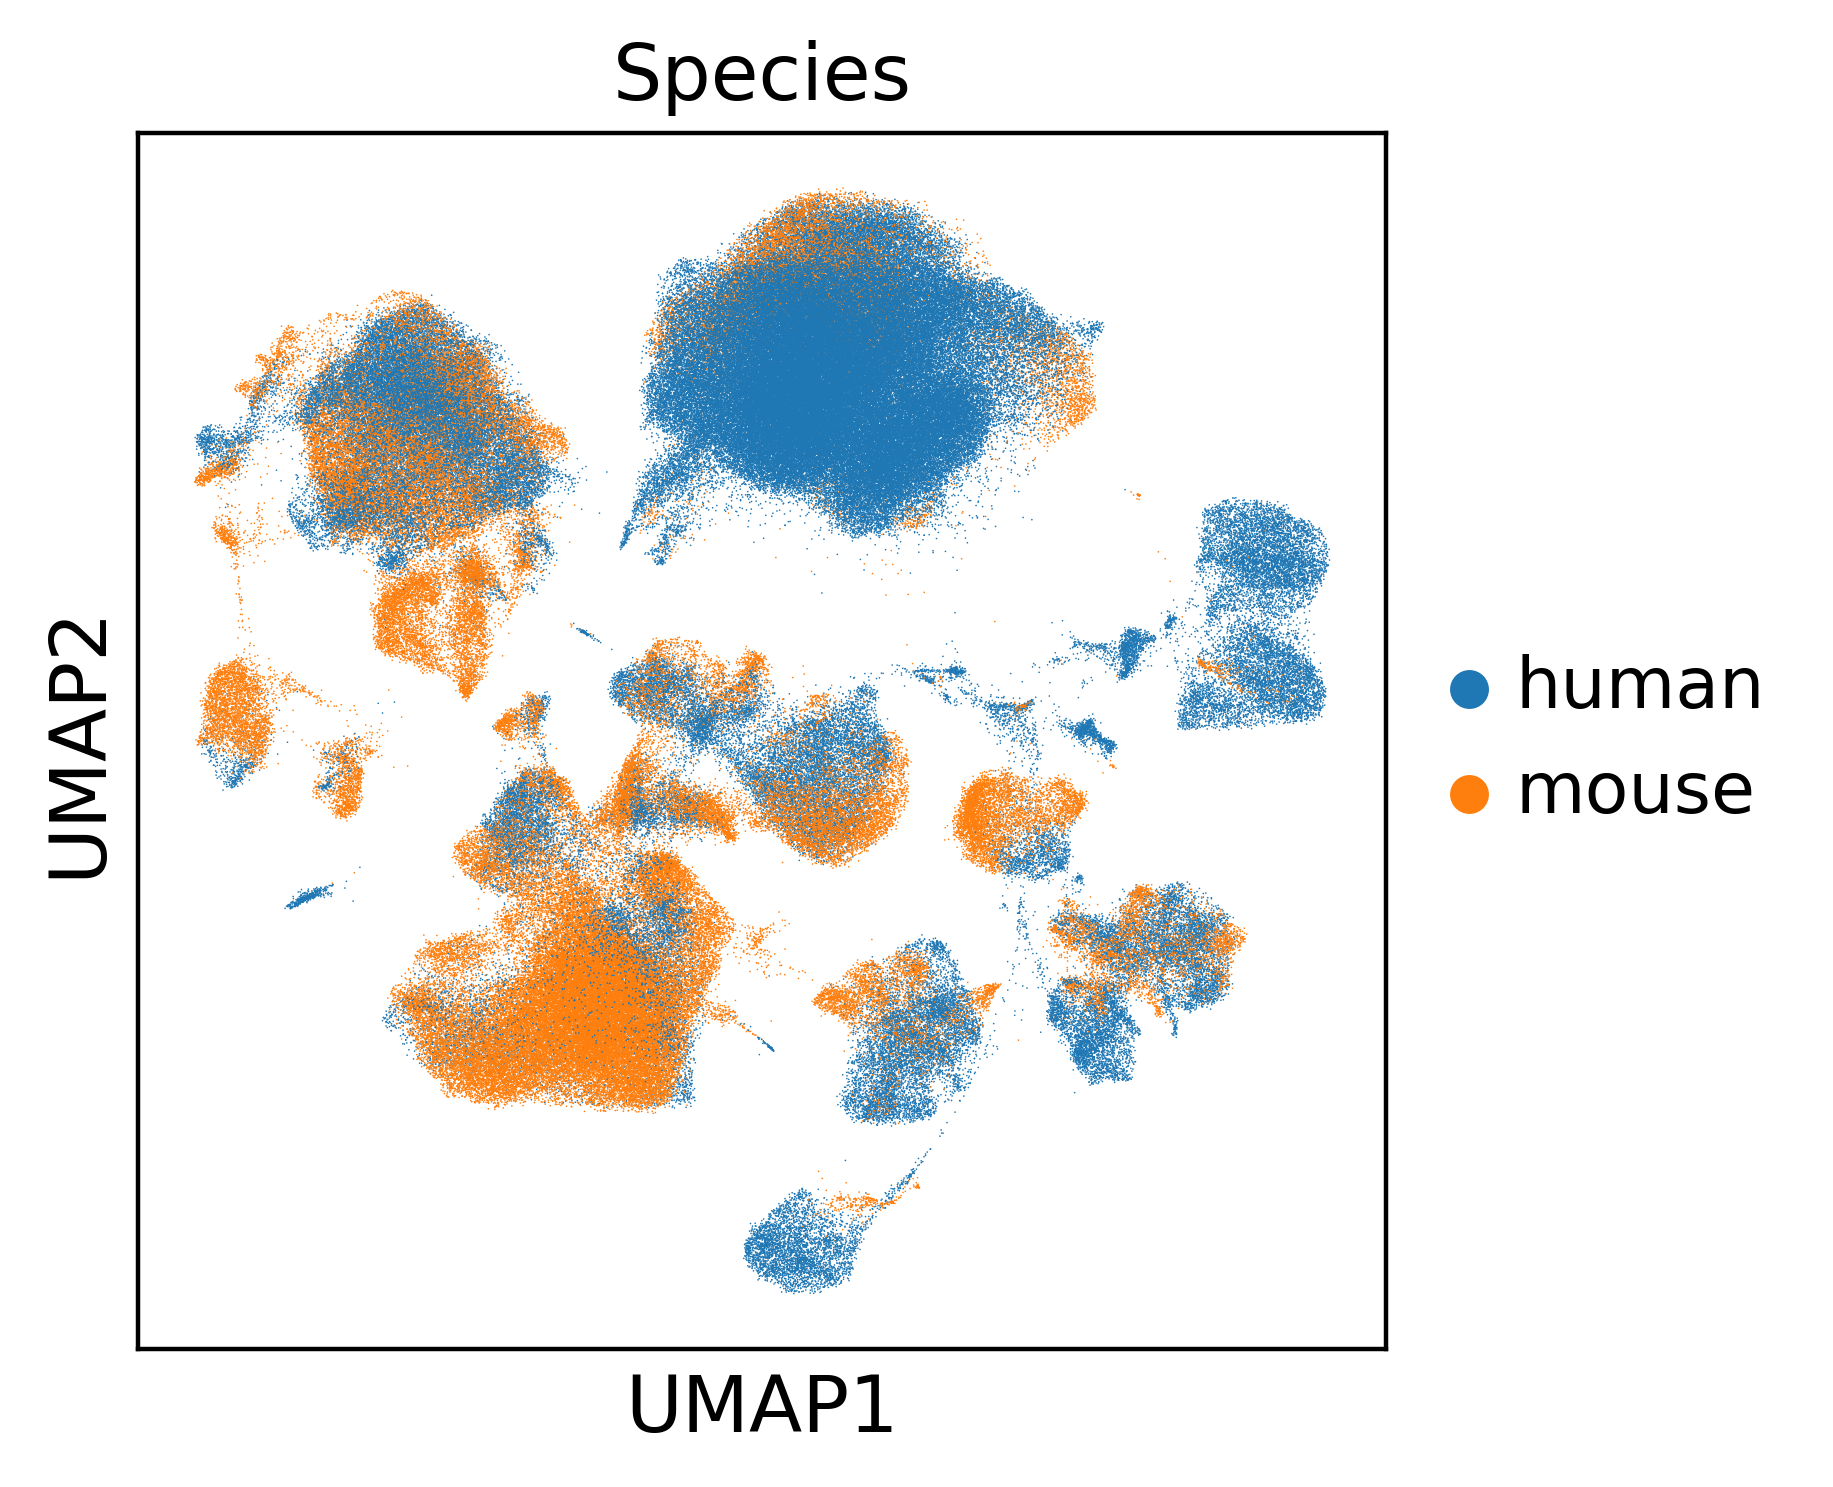

In [58]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata_clean, color=["Species"], save='human_mouse_integrate_scVI_v4.0_adata_clean_Species.pdf')
sc.settings.set_figure_params(dpi=200)

In [52]:
adata_human = adata[adata.obs['Species']=='human']
adata_mouse = adata[adata.obs['Species']=='mouse']

***
Marker gene

In [24]:
for cell_type_name in ['Cycling', 'MF-IIfg', 'VenEC', 'B plasma', 'cCD2', 'MF-Ifg', 'FB', 'Monocyte', 'LymphEC', 'SMC', 'ArtEC', 'MuSC', 'Macrophage', 'NGFR+FB', 'T cell', 'Tenoc', 'NK cell', 'Pericyte', 'Mast cell', 'B cell', 'SGC', 'Schwann', 'pDC', 'Neutrophil', 'Mesothelial cell']:
    gene_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    score_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    logfc_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    pvals_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    padj_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    result_df = pd.DataFrame({'gene_list':gene_list,'scores':score_list,'logfoldchanges':logfc_list,'pvals':pvals_list,'pvals_adj':padj_list})
    filename = './write/marker_gene/integrage_human_marker_'+cell_type_name+'.csv'
    result_df.to_csv(filename)

In [57]:
with pd.ExcelWriter('./write/marker_gene/Integrate_human_marker.xlsx') as writer:
    for cell_type_name in ['Cycling', 'MF-IIfg', 'VenEC', 'B plasma', 'cCD2', 'MF-Ifg', 'FB', 'Monocyte', 'LymphEC', 'SMC', 'ArtEC', 'MuSC', 'Macrophage', 'PnFB', 'T cell', 'Tenococyte', 'NK cell', 'Pericyte', 'Mast cell', 'B cell', 'nmSchwann', 'mSchwann', 'pDC', 'Neutrophil', 'Mesothelial cell']:
        gene_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        score_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        logfc_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        pvals_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        padj_list = list(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_human.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        celltype_list = [cell_type_name]*len(gene_list)
        result_df = pd.DataFrame({'Celltype':celltype_list,'Gene':gene_list,'Scores':score_list,'Logfoldchanges':logfc_list,'Pvals':pvals_list,'Pvals_adj':padj_list})
        filename = cell_type_name
        result_df.to_excel(writer,sheet_name=filename,index=False)

In [26]:
for cell_type_name in ['Cycling', 'MF-IIfg', 'VenEC', 'B plasma', 'cCD2', 'MF-Ifg', 'FB', 'Monocyte', 'LymphEC', 'SMC', 'ArtEC', 'MuSC', 'Macrophage', 'NGFR+FB', 'T cell', 'Tenoc', 'NK cell', 'Pericyte', 'Mast cell', 'B cell', 'SGC', 'Schwann', 'pDC', 'Neutrophil', 'Mesothelial cell']:
    gene_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    score_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    logfc_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    pvals_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    padj_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
    result_df = pd.DataFrame({'Gene':gene_list,'Scores':score_list,'Logfoldchanges':logfc_list,'Pvals':pvals_list,'Pvals_adj':padj_list})
    filename = './write/marker_gene/integrage_mouse_marker_'+cell_type_name+'.csv'
    result_df.to_csv(filename)

In [59]:
with pd.ExcelWriter('./write/marker_gene/Integrate_mouse_marker.xlsx') as writer:
    for cell_type_name in ['ArtEC', 'VenEC', 'Tenococyte', 'SMC', 'PnFB', 'MuSC', 'mSchwann', 'Macrophage', 'FB', 'nmSchwann', 'Pericyte', 'cCD2', 'B cell', 'LymphEC', 'T cell', 'Monocyte', 'NK cell', 'Neutrophil', 'B plasma', 'Cycling', 'MF-IIfg', 'MF-Ifg', 'Mesothelial cell', 'Mast cell']:
        gene_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['names'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        score_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['scores'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        logfc_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        pvals_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        padj_list = list(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name][np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['pvals_adj'])[cell_type_name]<0.05)*np.array(pd.DataFrame(adata_mouse.uns['rank_genes_groups']['logfoldchanges'])[cell_type_name]>0)])
        celltype_list = [cell_type_name]*len(gene_list)
        result_df = pd.DataFrame({'Celltype':celltype_list,'Gene':gene_list,'Scores':score_list,'Logfoldchanges':logfc_list,'Pvals':pvals_list,'Pvals_adj':padj_list})
        filename = cell_type_name
        result_df.to_excel(writer,sheet_name=filename,index=False)

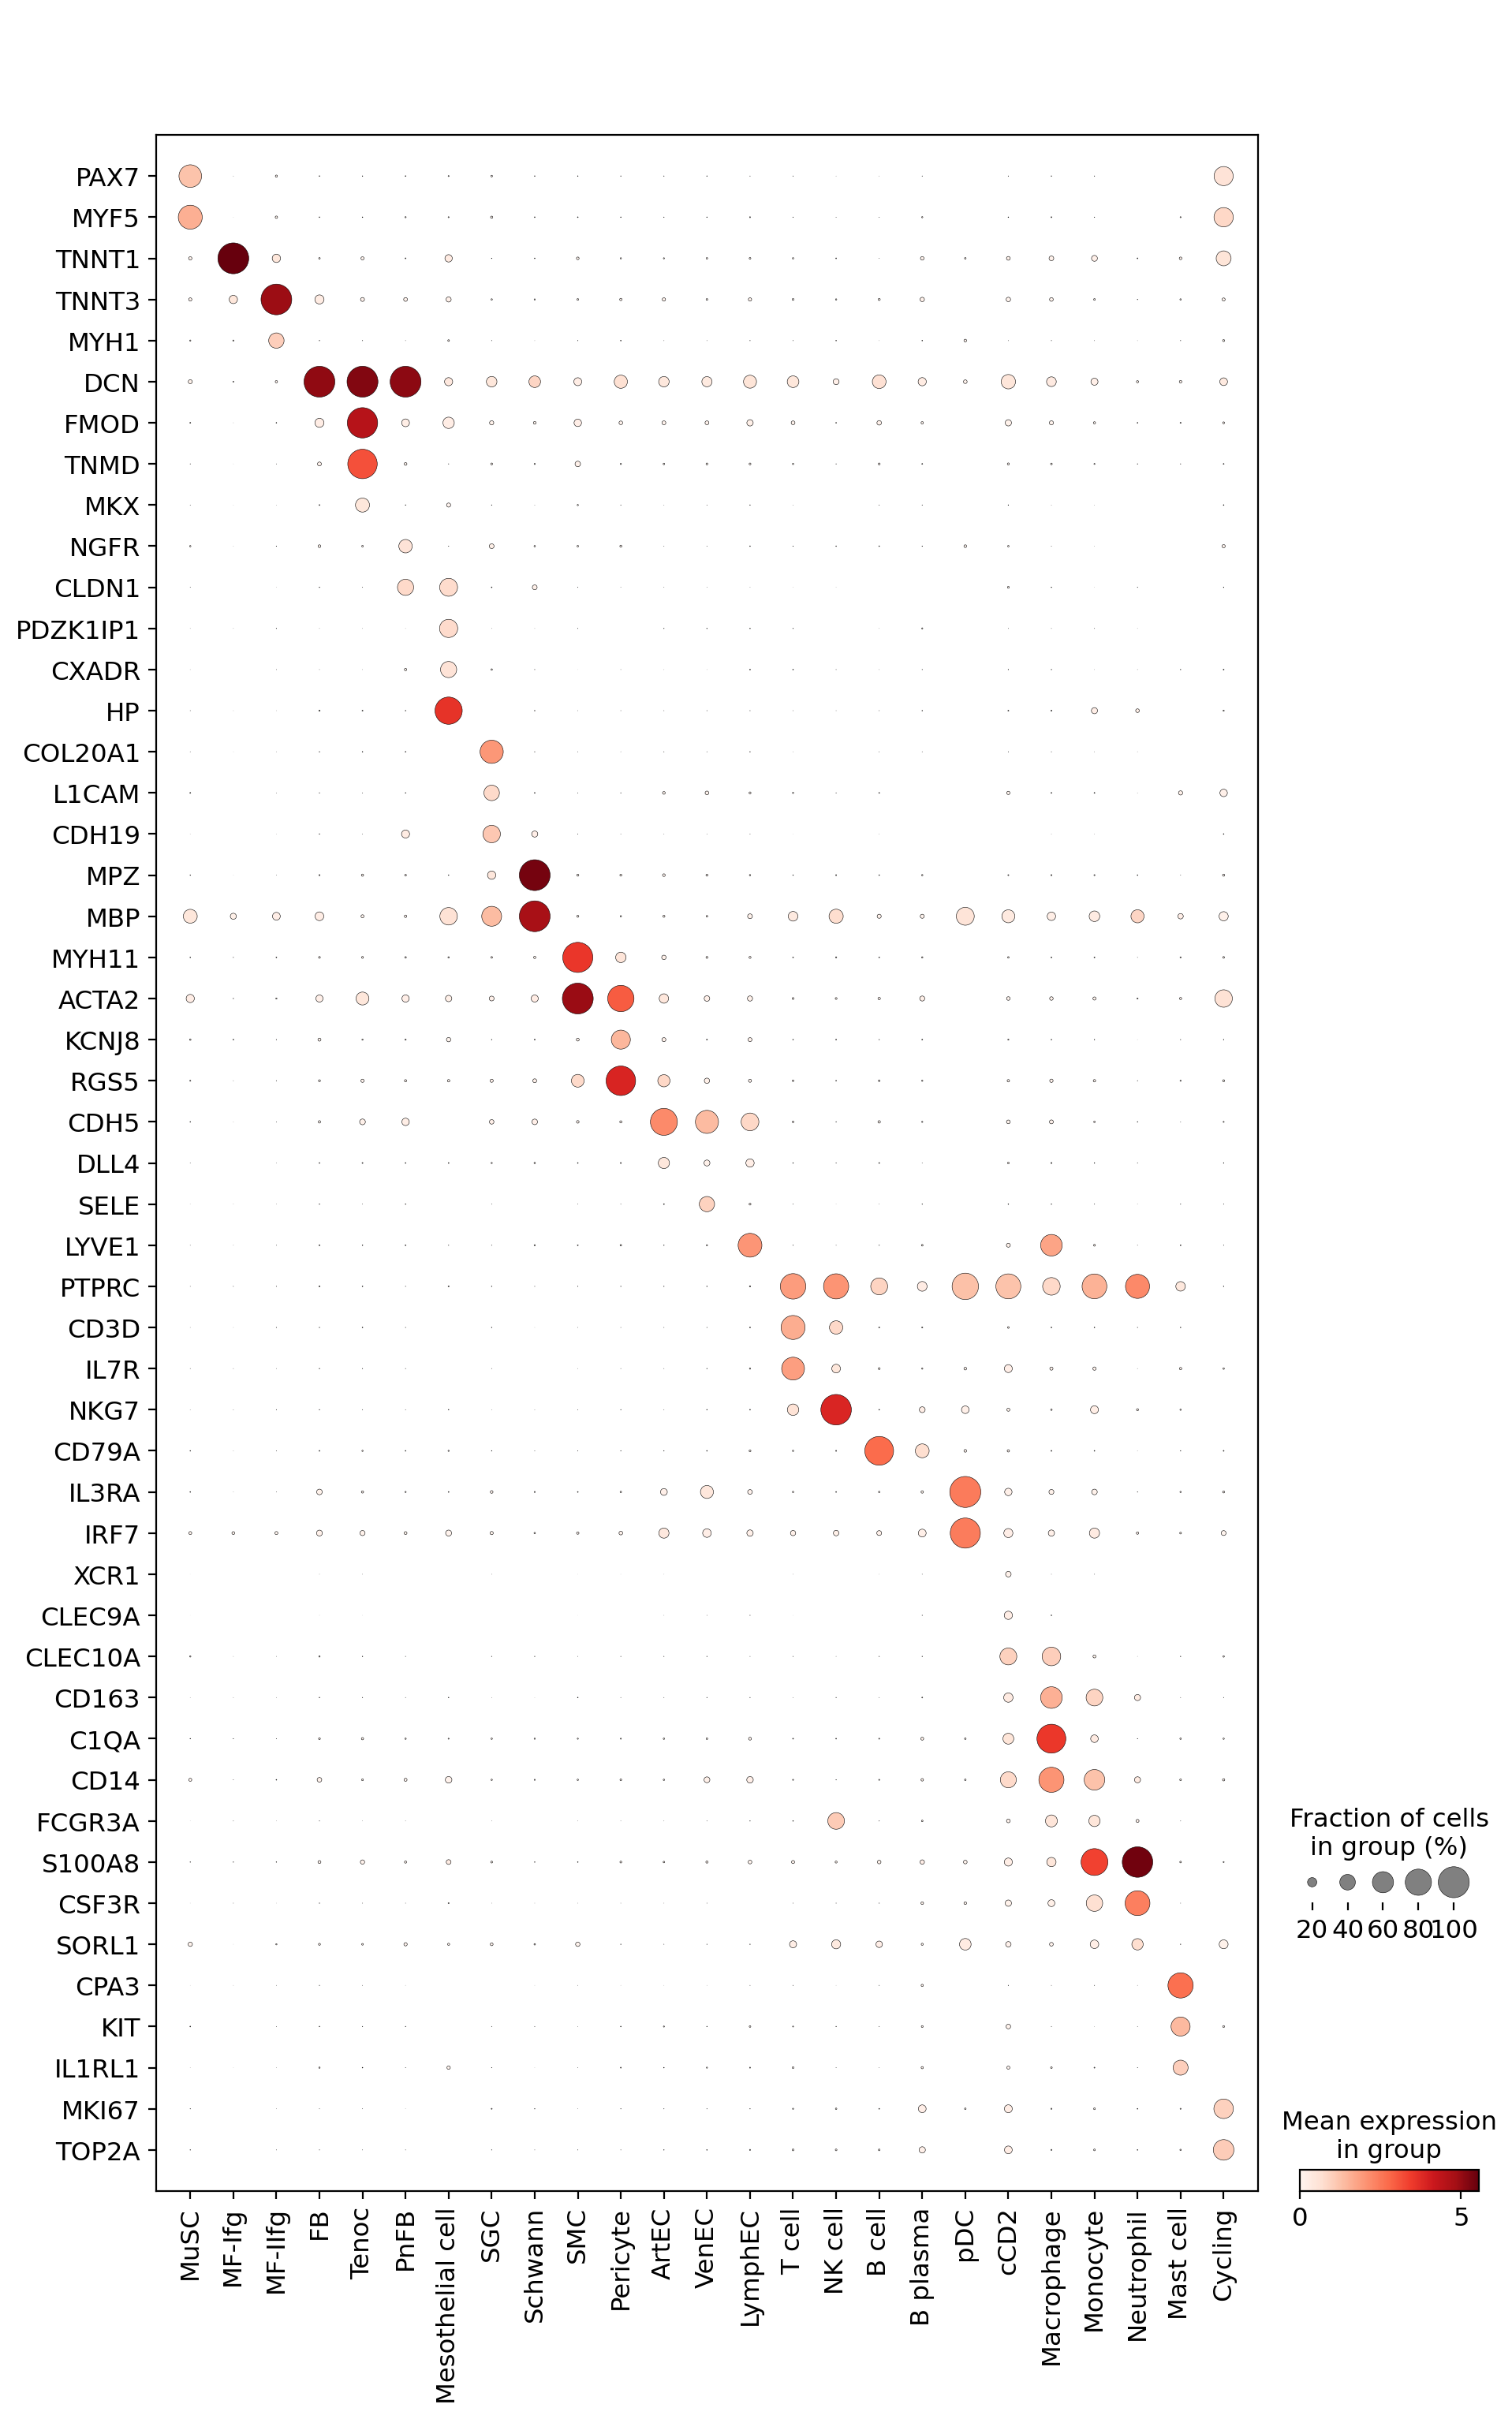

In [19]:
sc.pl.dotplot(adata_clean,['PAX7','MYF5','TNNT1','TNNT3','MYH1','DCN','FMOD','TNMD','MKX','NGFR','CLDN1','PDZK1IP1','CXADR','HP','COL20A1','L1CAM','CDH19','MPZ','MBP','MYH11','ACTA2','KCNJ8','RGS5','CDH5','DLL4','SELE','LYVE1','PTPRC','CD3D','IL7R','NKG7','CD79A','IL3RA','IRF7','XCR1','CLEC9A','CLEC10A','CD163','C1QA','CD14','FCGR3A','S100A8','CSF3R','SORL1','CPA3', 'KIT', 'IL1RL1','MKI67','TOP2A'],groupby='leiden_annotation',categories_order=['MuSC','MF-Ifg','MF-IIfg','FB','Tenoc','PnFB','Mesothelial cell','SGC','Schwann','SMC','Pericyte','ArtEC','VenEC','LymphEC','T cell','NK cell','B cell','B plasma','pDC','cCD2','Macrophage','Monocyte','Neutrophil','Mast cell','Cycling',],swap_axes=True,
             save='human_mouse_integrate_scVI_v4.0_adata_clean_marker.pdf')

In [19]:
# 没有 'mouse-pDC',
sc.pl.dotplot(adata_clean,['DLK1','MYF5','CRLF1','GAL','PDE4DIP','ANKRD1', 'RTN2','PDK2','NOVA1','WISP2','CLEC3B','HHIP', 'STEAP2','CHAD', 'CILP2','NGFR','SLC22A3','STRA6','LRP4','PDZK1IP1', 'FBXO2','CLDN10','ZNF579','SCRG1','KCNMB4','CA12', 'CSMD1', 'LHPP','NEK1','EMID1', 'SLC36A2','CSDC2', 'ACTG2','OR51E2','RGS7BP','AGAP2', 'DCBLD1','VTN','ENPEP','SLC14A1','BTNL9','AQP7','RSAD2','MPZL2','C2CD4B','PRPF40B', 'ZNF436','SMOC1', 'GIPC2','NTS', 'PARD6G','IL7R', 'OXNAD1','DAPL1', 'CXCR6','CMC1','GZMM','NCR1', 'FASLG','P2RX5','HLA-DOB','CXCR5','PIM2','EDEM2', 'TP53INP1','IRF4', 'MED26','RIPK2','CLEC4M', 'TNIP3','MARCO', 'BCAT1','PF4','TREM2','OLR1', 'RETN', 'MEFV','GPR35','TMCC3','USP10','CAMP', 'IRG1','HPGD','SLC6A4', 'CYP11A1', 'NUDT14','CLEC11A','INCENP', 'HAUS4',],groupby='Species_annotation',categories_order=['human-MuSC','mouse-MuSC','human-MF-Ifg','human-MF-IIfg','mouse-MF-Ifg','mouse-MF-IIfg','human-FB','mouse-FB','human-Tenococyte','mouse-Tenococyte','human-PnFB','mouse-PnFB','human-Mesothelial cell','mouse-Mesothelial cell','human-nmSchwann','mouse-nmSchwann','human-mSchwann','mouse-mSchwann','human-SMC','mouse-SMC','human-Pericyte','mouse-Pericyte','human-ArtEC','mouse-ArtEC','human-VenEC','mouse-VenEC','human-LymphEC','mouse-LymphEC','human-T cell','mouse-T cell','human-NK cell','mouse-NK cell','human-B cell','mouse-B cell','human-B plasma','mouse-B plasma','human-pDC','human-cCD2','mouse-cCD2','human-Macrophage','mouse-Macrophage','human-Monocyte','mouse-Monocyte','human-Neutrophil','mouse-Neutrophil','human-Mast cell','mouse-Mast cell','human-Cycling','mouse-Cycling',],swap_axes=True,
             save='human_mouse_integrate_scVI_v4.0_adata_clean_Species_marker2.pdf')